<img src="https://i.ibb.co/K5n24Nd/1.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>



# Cotações Financeiras
## Objetivo:
* Obter dados financeiros, referentes as ações das maiores empresas siderúrgicas do mercado brasileiro sendo elas: `Gerdau`, `Vale`, `Usiminas`, `CSN` e `ArcelorMittal`, conforme apontado em nosso estudo do mercado;
* Limpar os dados;
* Plotar gráficos, para verificar visualmente a consistência dos dados;
* Exportar as cotações em formato `.csv`


<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#'a'>Minerando os Dados</a></li>
        <li><a href=#2>Limpeza e Validação dos Dados</a></li>
        <li><a href=#1>Modelando e Exportando os Dados</a></li>
    *O  redirecionamento automático do índice não funciona no GitHub, para utilizá-lo, baixe o notebook em sua máquina
    </ol>
</div>
<br>
<hr>



Importando bibliotecas

In [36]:
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime


## <h2 id="a">Minerando os Dados</h2>

Declarando datas de referência para nossa query, códigos e nomes das empresas na Bovespa. `(Estes valores foram apurados no` [Yahoo Finance](https://finance.yahoo.com/)`)`.


In [37]:
empresas = {'GGBR4.SA': 'Gerdau preferenciais', 'GGBR3.SA': 'Gerdau Metalúrgica preferenciais',
             'VALE3.SA': 'Vale', 'USIM5.SA': 'Usiminas',  'CSNA3.SA': 'CSN', 'ARMT34.SA': 'AcelorMittal Brasil'} 
             # Declarando dicionário com as empresas e os códigos na bolsa de valores.

# Informando parâmetros da query:
tempo_inicial = ('01-01-2016')
tempo_final = datetime.date.today() # Utilizando a biblioteca date.time para retornar o dia atual.

Utilizando um for para realizar nossa query

Gerdau preferenciais:


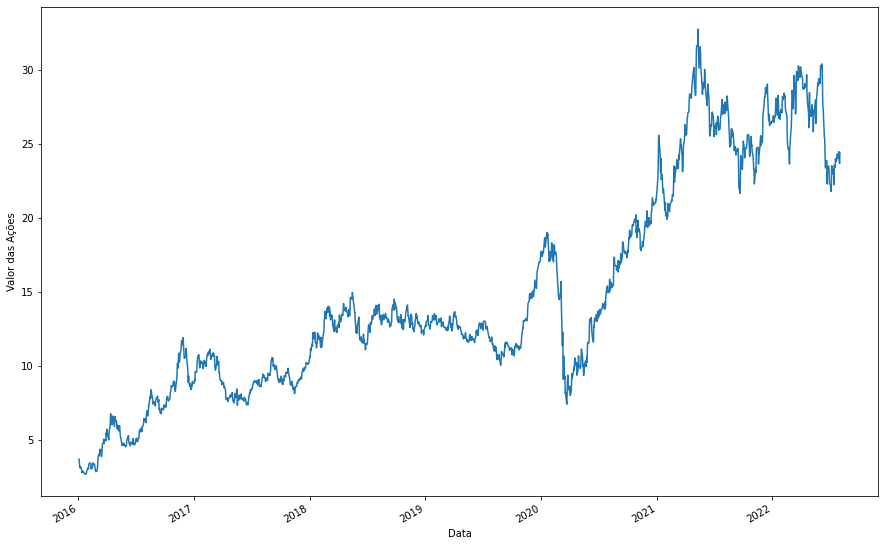

Gerdau Metalúrgica preferenciais:


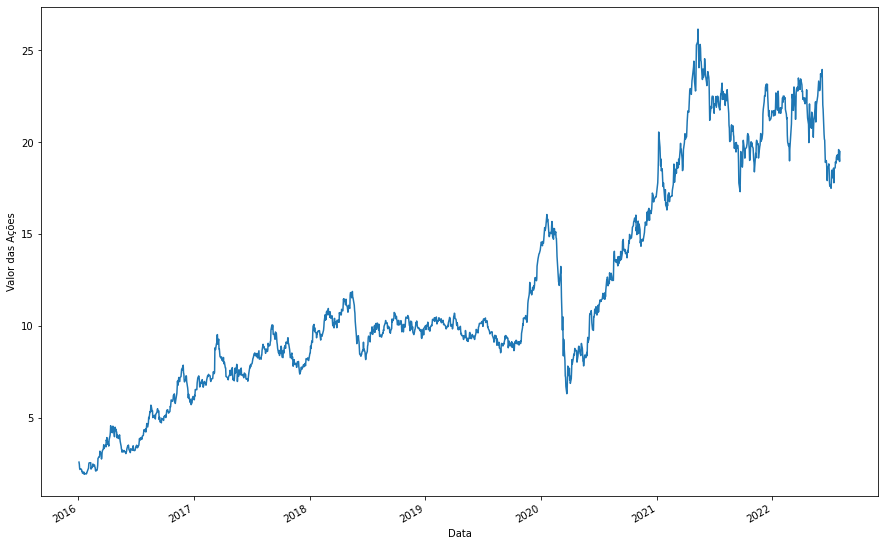

Vale:


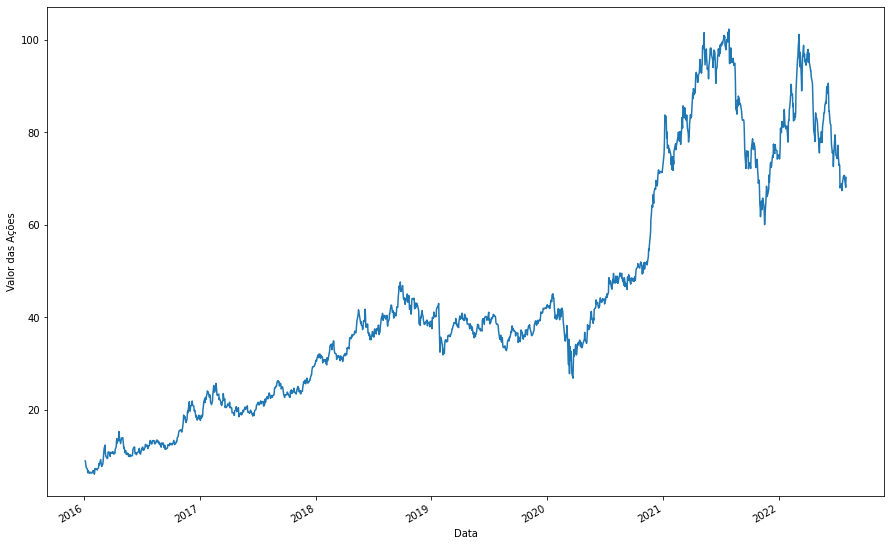

Usiminas:


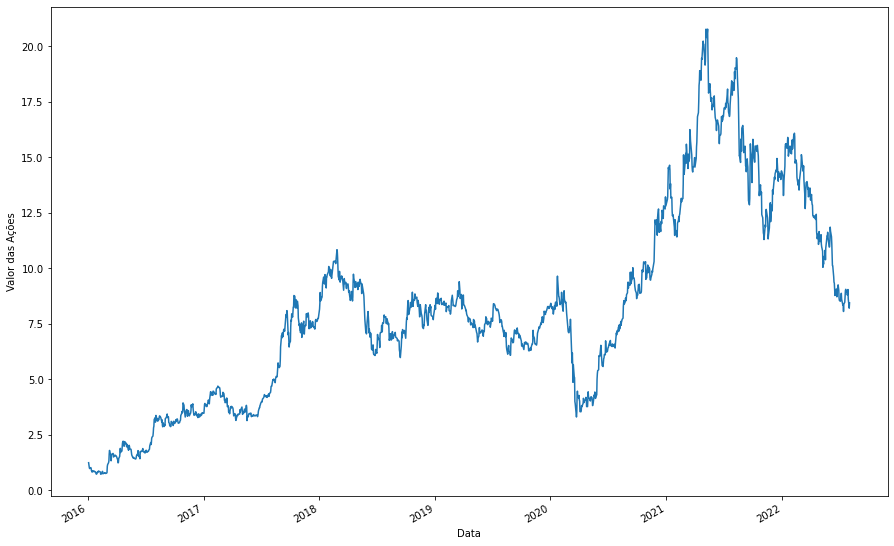

CSN:


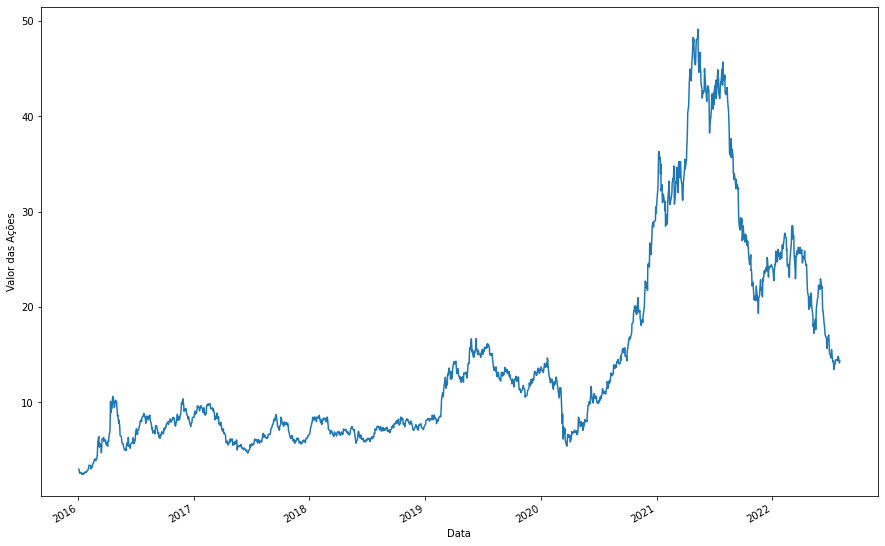

AcelorMittal Brasil:


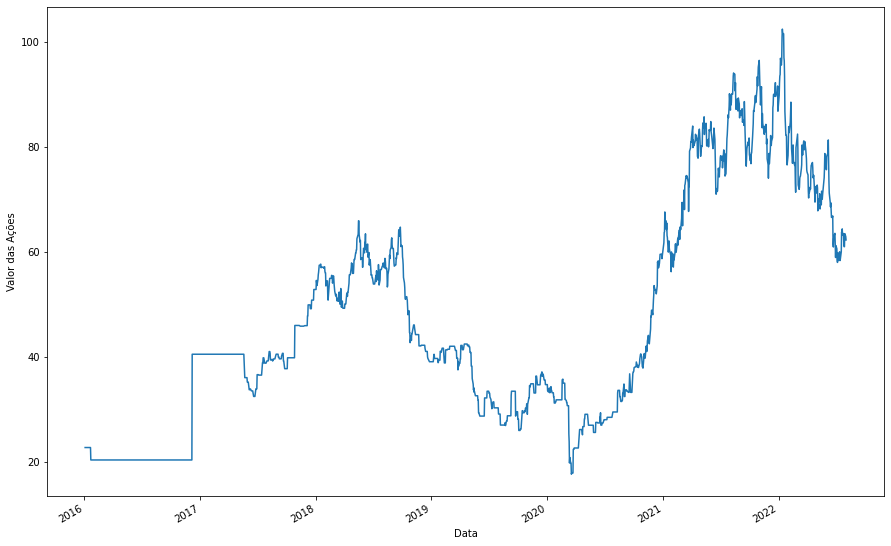

In [38]:
for cod in empresas: # Repetindo uma vez para cada empresa no dicionário "empresas" supra declarado.
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Query de cotação;
    print(f'{empresas[cod]}:') # Escrevendo o nome de cada empresa antes do seu respectivo gráfico;
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Escolhi o parâmetro de fechamento ajustado na fonte de dados;
    plt.xlabel("Data") # Título do eixo X;
    plt.ylabel("Valor das Ações") # Título do eixo Y;
    plt.show() # Mostrando o gráfico plotado.

## <h2 id="2">Limpeza e validação dos dados</h2>

Segundo a verificação visual, os valores de 2016 até 2017 da ArcelorMittal estão inconsistentes, vou verificar o que esta acontecendo abaixo.

In [39]:
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando a cotação da ArcelorMittal;
cotacao # Exibindo a cotação geral.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-05,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-06,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-07,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
2016-01-08,23.550022,23.550022,23.550022,23.550022,0.0,22.683975
...,...,...,...,...,...,...
2022-07-27,61.029999,60.910000,60.990002,60.939999,7.0,60.939999
2022-07-28,61.560001,60.590000,61.029999,60.939999,1429.0,60.939999
2022-07-29,63.889999,61.380001,61.380001,63.419998,1041.0,63.419998


In [40]:
pd.options.display.max_rows = 365 # Aumentando as linhas que o pandas mostra para 365, por padrão mostra poucas linhas;
display(cotacao['Adj Close'][:365]) # Mostrando as enésimas 365 cotações.

Date
2016-01-04    22.683975
2016-01-05    22.683975
2016-01-06    22.683975
2016-01-07    22.683975
2016-01-08    22.683975
2016-01-11    22.683975
2016-01-12    22.683975
2016-01-13    22.683975
2016-01-14    22.683975
2016-01-15    22.683975
2016-01-18    22.683975
2016-01-19    22.683975
2016-01-20    22.683975
2016-01-21    22.683975
2016-01-22    20.314440
2016-01-26    20.314440
2016-01-27    20.314440
2016-01-28    20.314440
2016-01-29    20.314440
2016-02-01    20.314440
2016-02-02    20.314440
2016-02-03    20.314440
2016-02-04    20.314440
2016-02-05    20.314440
2016-02-10    20.314440
2016-02-11    20.314440
2016-02-12    20.314440
2016-02-15    20.314440
2016-02-16    20.314440
2016-02-17    20.314440
2016-02-18    20.314440
2016-02-19    20.314440
2016-02-22    20.314440
2016-02-23    20.314440
2016-02-24    20.314440
2016-02-25    20.314440
2016-02-26    20.314440
2016-02-29    20.314440
2016-03-01    20.314440
2016-03-02    20.314440
2016-03-03    20.314440
2016-03-04 

Como podemos observar acima, os dados do Yahoo Finance, referentes a empresa `AcelorMittal`, de 2016 até a metade de 2017, estão se repetindo, como se não houvesse havido alterações no valor das ações neste período. Como a outra fonte de dados, que seria o Google, foi descontinuada, vou retirar estes dados inconsistentes da nossa consulta

Vou repetir a query, excluindo o período inconsistente

Gerdau preferenciais:


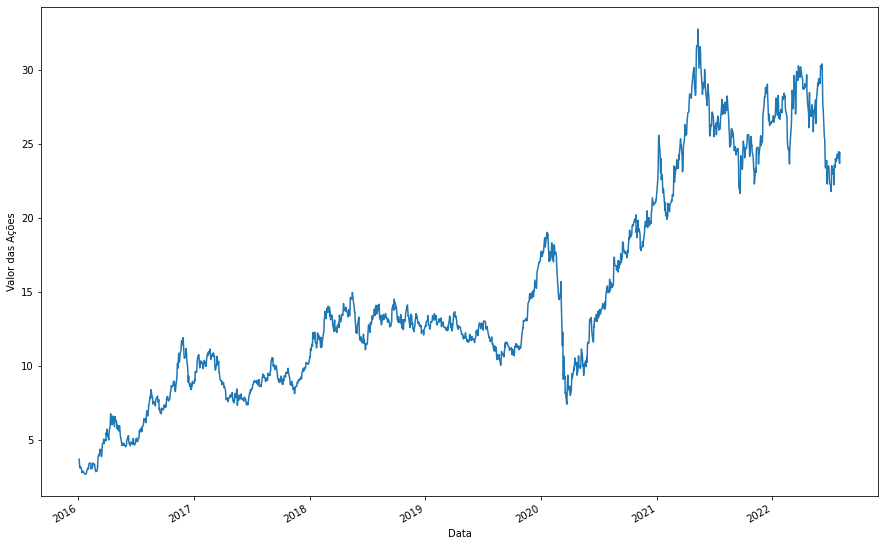

Gerdau Metalúrgica preferenciais:


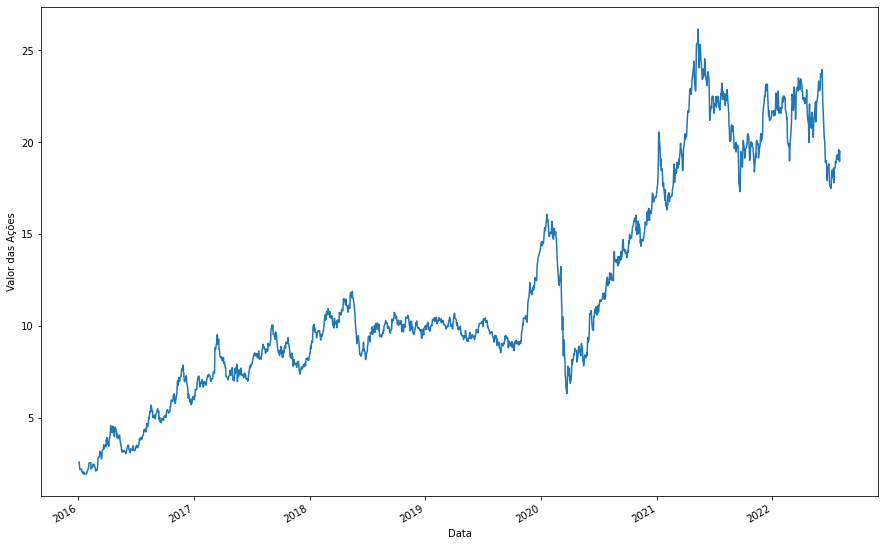

Vale:


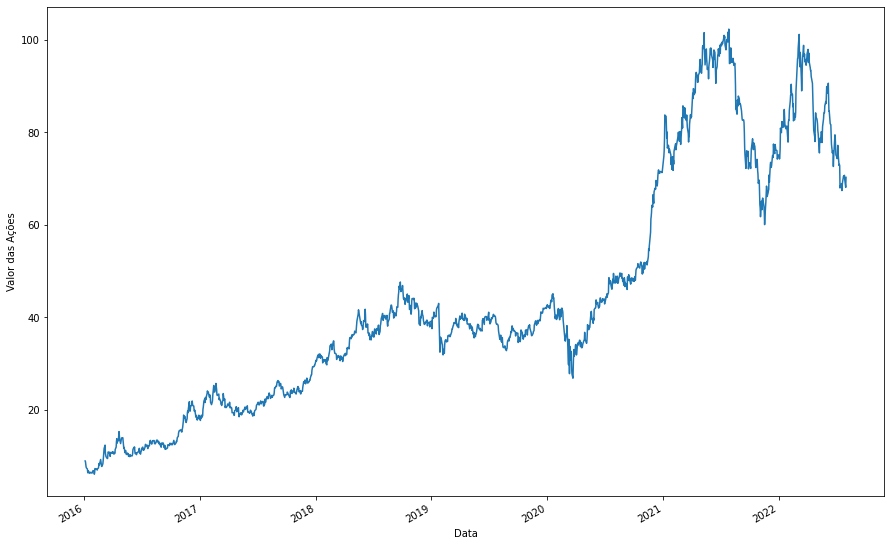

Usiminas:


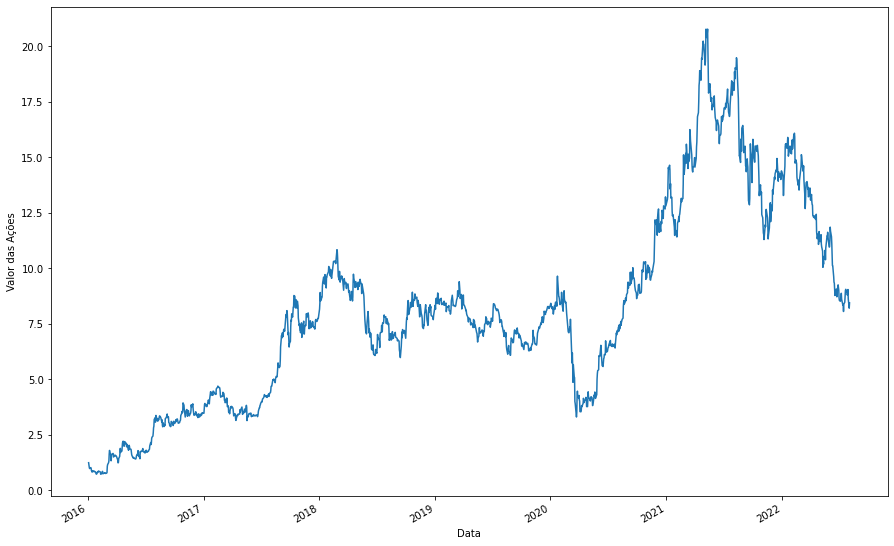

CSN:


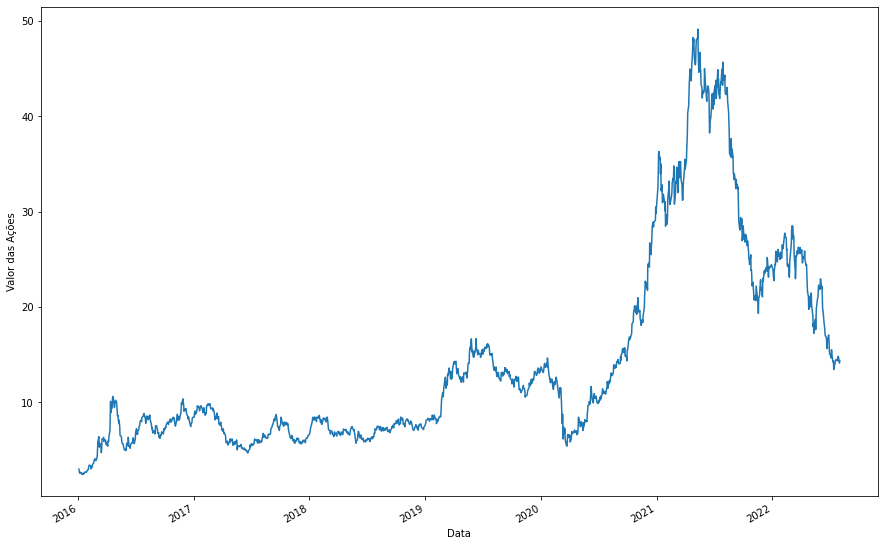

Arcelor Mittal Brasil: 


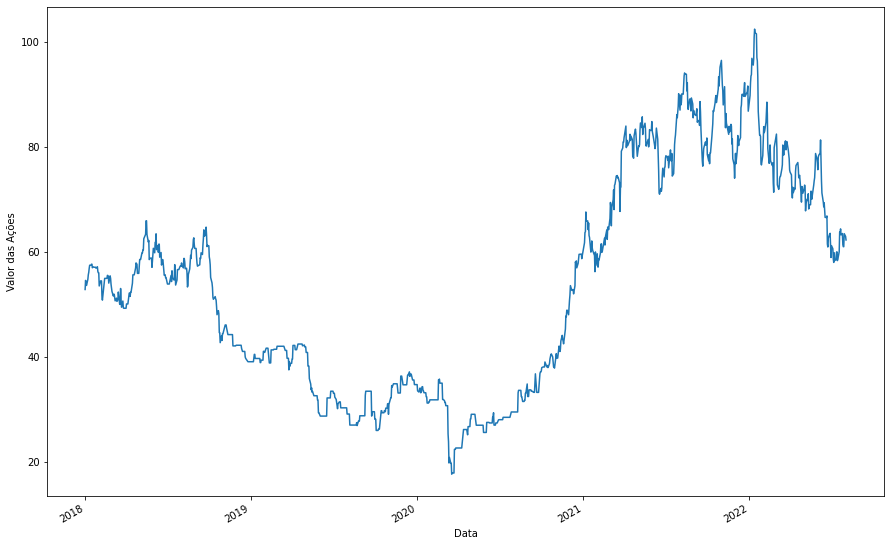

In [41]:
del empresas['ARMT34.SA'] # Deletando a ArcelorMittal do dicionário de empresas(vamos adicionar ela separadamente ao final);


for cod in empresas: # Estrutura for de repetição, correndo, de uma em uma, cada empresa em nosso dicionário;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando cotação do Yahoo financas;
    print(f'{empresas[cod]}:') # Comando para escrever o nome de cada empresa antes do seu respectivo gráfico;
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanho da figura do gráfico;
    plt.xlabel("Data") # Declarando rótulo do eixo X; 
    plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;
    plt.show() # Mostrando o gráfico plotado;

# Aqui encerra o loop de repetição e abaixo faremos a cotação da ArcelorMittal
     
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final) # Puxando cotação do Yahoo finanças;
print('Arcelor Mittal Brasil: ') # ArcelorMittal está com período diferente, pois os dados estavam inconsistentes na fonte.
cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanho da figura do gráfico;
plt.xlabel("Data") # Declarando rótulo do eixo X; 
plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;
plt.show() # Mostrando o gráfico plotado;

Agora sim, os valores estão consistentes,
Vou revalidá-los para garantir, desta vez vamos plotar todas as empresas em um gráfico só.

Arcelor Mittal Brasil: 


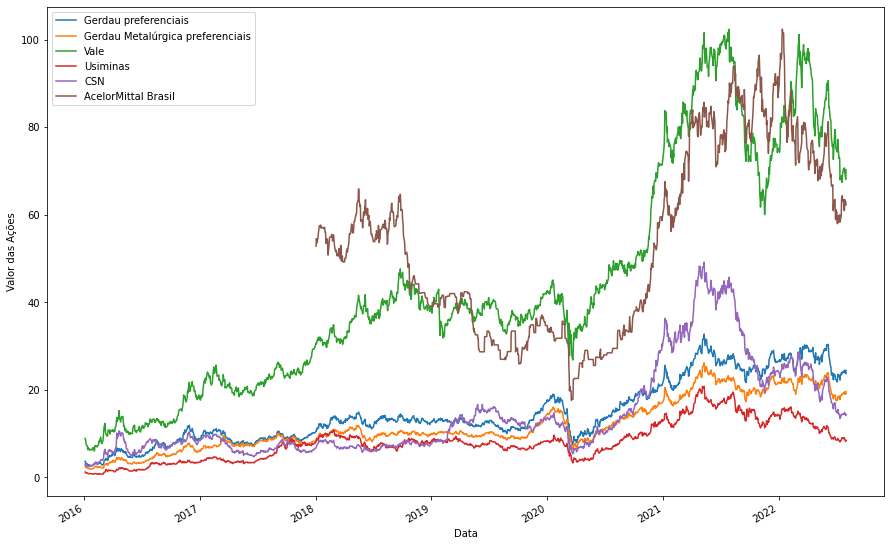

In [42]:
for cod in empresas: # Estrutura de repetição correndo todas empresas no nosso dicionário;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final)
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanh da figura do gráfico;
    plt.xlabel("Data") # Declarando rótulo do eixo X;
    plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;   
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final) # Setando o período query da ArcelorMittal, excluindo os anos de 2016 a 2017, pois estavam inconsistentes;
print('Arcelor Mittal Brasil: ') # Colocando o título, com o nome da empresa, para aparecer antes do gráfico;
cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanho da figura do gráfico;
plt.xlabel("Data") # Declarando rótulo do eixo X;
plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;
plt.legend(['Gerdau preferenciais', 'Gerdau Metalúrgica preferenciais', 'Vale', 'Usiminas', 'CSN', 'AcelorMittal Brasil']) # Criando uma legenda para o gráfico;
plt.show() # Como eu não pedi para o Python mostrar a figura a cada repetição do laço 'for', ele mostra só agora, mas com todas as empresas juntas. 


Salvei este gráfico na pasta do ciclo, pois é interessante para nossa posterior análise exploratória dos dados.
Só de olhar para este gráfico já tenho três pré `Insights`:



* Salvo as proporções, todas as empresas apresentaram oscilações parecidas e nos mesmo períodos, generalizando, aonde houve um pico de valor para uma, houve pico de valor para as outras, onde houve um declínio para uma, houve para as outras;

* Em verde a Vale, teve um desempenho muito acima da média, começou valendo na casa dos 10 reais, como a maioria, só que terminou muito acima da maioria, ficou na casa dos 70 reais, enquanto que as outras que no começo valiam quase a mesma coisa, estavam encerraram abaixo dos 25 reais no final do período;

* As ações da ArcelorMittal e da Vale, valeram durante todo o período, mais que as das outras empresas.

> `Dados válidados com sucesso`
<hr>

## <h3 id="3">Modelando e Exportando os dados </h3>

Agora vou criam uma matriz com todos os dados, para pode posteriormente exportá-la

Primeiramente vou criar o dataframe com as datas na primeira coluna:

In [43]:
cotacao = web.DataReader('GGBR4.SA', data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando uma cotação qualquer com o intervalo de datas desejado;
cotacao.reset_index(inplace=True) # As datas estavam como índice, aqui transformo-as em coluna;
cotacao.rename(columns={'Date':'Data'}, inplace=True) # Renomeando a coluna de "Date", para "Data";
df = cotacao['Data'].copy() # Criando uma série, já com as datas;
df.to_csv('datas.csv') # Exportando a série para um arquivo .csv
df = pd.read_csv('datas.csv', usecols=[1]) # Criando um frame de dados a partir do .csv exportado
df


,Data
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
1634,2022-07-27
1635,2022-07-28
1636,2022-07-29
1637,2022-08-01


Agora vou fazer uma estrutura de repetição "for", para: puxar as cotações, resetar o index, renomear a coluna e adicionar ao nosso frame de dados.

In [44]:
for cod in empresas:
    nome = empresas[cod] # Definindo o nome da empresa que rodará no loop;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando a cotação;
    cotacao.reset_index(inplace=True) # Reiniciando o índice, que estava como as datas, para ele ficar numérico;
    cotacao.rename(columns={'Adj Close':nome}, inplace=True) # Renomeando a coluna de fechamento da ação, para o nome da empresa(loop);
    coluna_extraida = cotacao[nome] # extraindo a coluna
    df = df.join(coluna_extraida) # adcionando a coluna ao nosso frame de dados.
df

,Data,Gerdau preferenciais,Gerdau Metalúrgica preferenciais,Vale,Usiminas,CSN
0,2016-01-04,3.674641,2.575698,8.886400,1.240651,3.001189
1,2016-01-05,3.504669,2.467410,8.767356,1.138680,2.853462
2,2016-01-06,3.221382,2.243100,8.123110,1.036708,2.627984
3,2016-01-07,3.075691,2.173487,7.639924,0.977225,2.565784
4,2016-01-08,3.180912,2.188957,7.380826,1.002718,2.659085
...,...,...,...,...,...,...
1634,2022-07-27,24.010000,19.040001,70.519997,8.880000,14.660000
1635,2022-07-28,24.129999,19.059999,70.690002,9.040000,14.830000
1636,2022-07-29,24.459999,19.600000,69.750000,8.610000,14.710000
1637,2022-08-01,23.670000,18.950001,68.080002,8.200000,14.130000


Agora vou adicionar, individualmente, também os dados da `ArcelorMittal Brasil`, que estão com os anos de 2016 e 2017 corrompidos
GGBR4.SA AcelorMittal Brasil

In [45]:
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando a cotação;
cotacao.reset_index(inplace=True) # Reiniciando o índice, que estava como as datas, para ele ficar numérico;
cotacao.rename(columns={'Adj Close':'ArcelorMittal Brasil'}, inplace=True) # Renomeando a coluna de fechamento da ação, para o nome da empresa;
coluna_extraida = cotacao['ArcelorMittal Brasil'] # extraindo a coluna
df = df.join(coluna_extraida) # adcionando a coluna ao nosso frame de dados.
df

,Data,Gerdau preferenciais,Gerdau Metalúrgica preferenciais,Vale,Usiminas,CSN,ArcelorMittal Brasil
0,2016-01-04,3.674641,2.575698,8.886400,1.240651,3.001189,22.683973
1,2016-01-05,3.504669,2.467410,8.767356,1.138680,2.853462,22.683973
2,2016-01-06,3.221382,2.243100,8.123110,1.036708,2.627984,22.683973
3,2016-01-07,3.075691,2.173487,7.639924,0.977225,2.565784,22.683973
4,2016-01-08,3.180912,2.188957,7.380826,1.002718,2.659085,22.683973
...,...,...,...,...,...,...,...
1634,2022-07-27,24.010000,19.040001,70.519997,8.880000,14.660000,60.939999
1635,2022-07-28,24.129999,19.059999,70.690002,9.040000,14.830000,60.939999
1636,2022-07-29,24.459999,19.600000,69.750000,8.610000,14.710000,63.419998
1637,2022-08-01,23.670000,18.950001,68.080002,8.200000,14.130000,62.910000


## Revalidação dos dados

De suma importancia é a validação dos dados, tenho que conferir, minunciosamente, se não houve nenhum erro no processo, pois isto implicaria em falhas sérias na análise e grandes perdas financeiras.

Então vou verificar visualmente se os dados do dataframe estão iguais aos das cotações:

Gerdau preferenciais plot original, direto do Yahoo Finance:


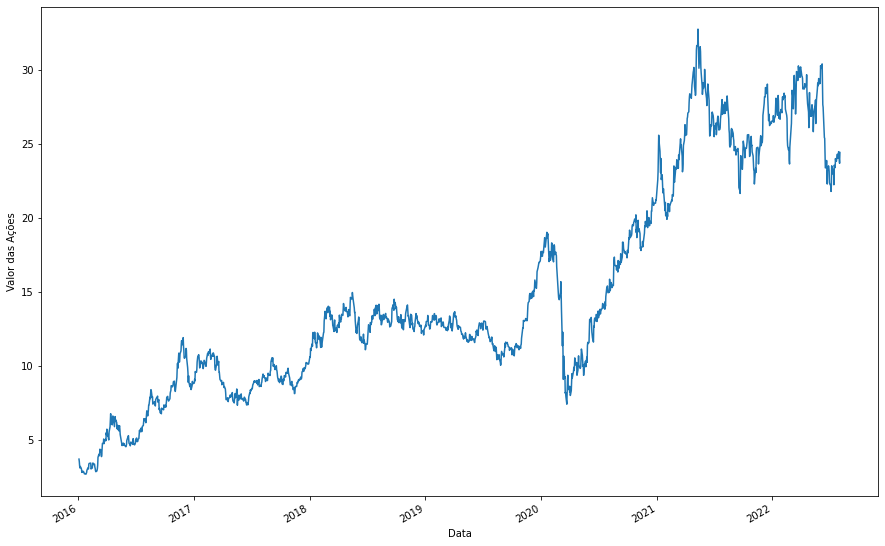

Dados do dataframe:


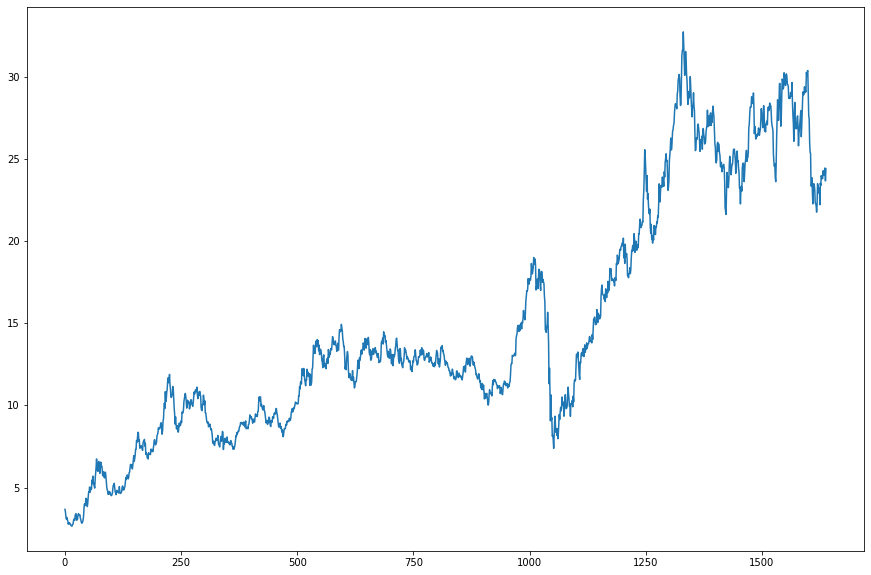

---------------------------------------------------------------------------------------------------
Gerdau Metalúrgica preferenciais plot original, direto do Yahoo Finance:


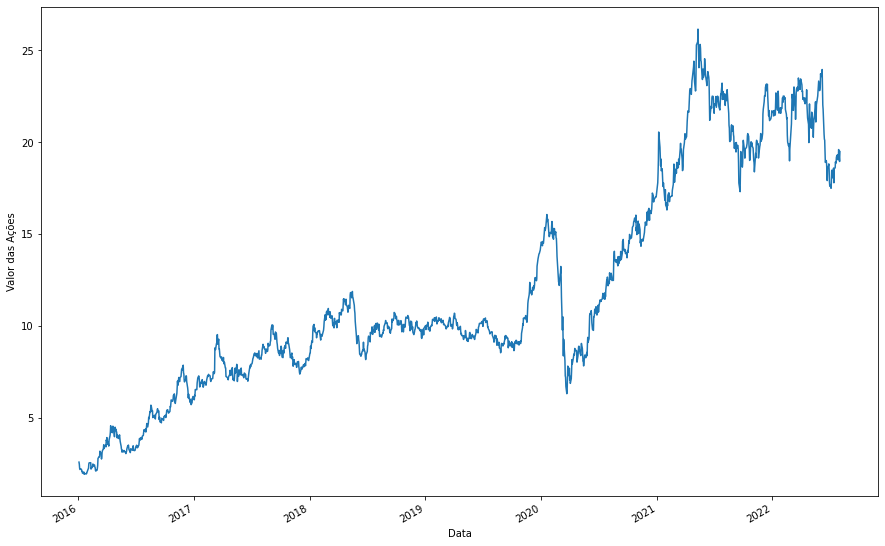

Dados do dataframe:


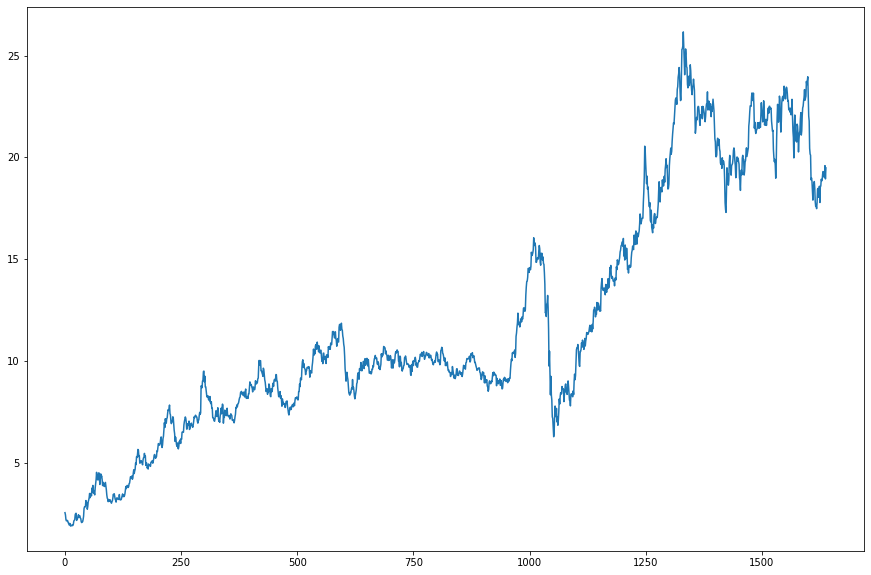

---------------------------------------------------------------------------------------------------
Vale plot original, direto do Yahoo Finance:


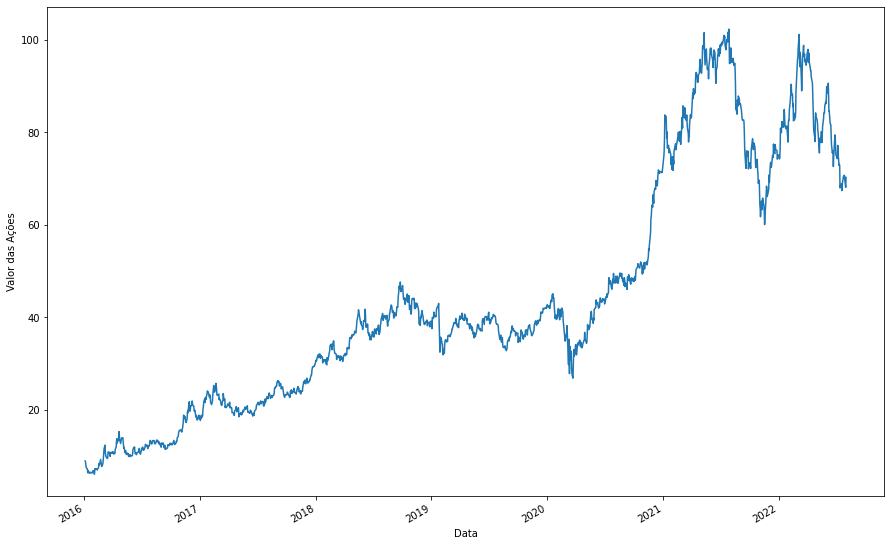

Dados do dataframe:


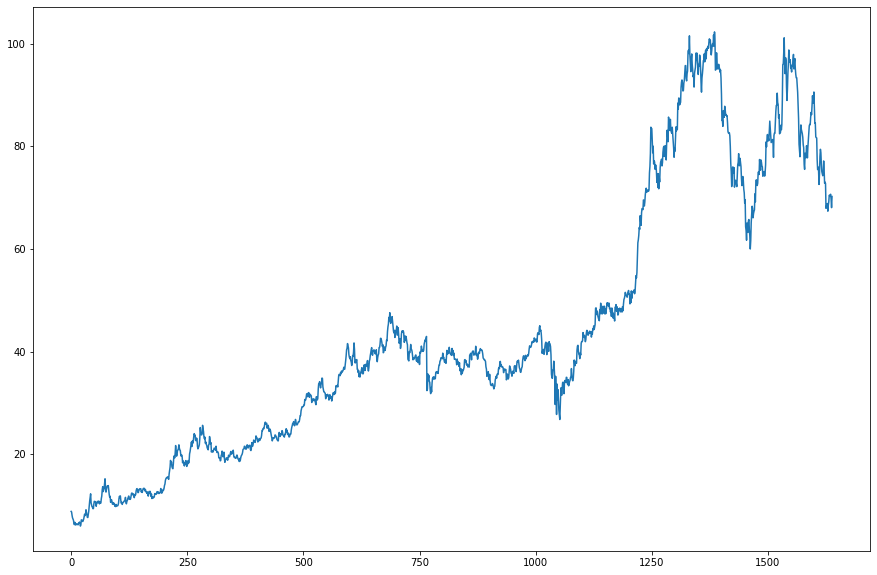

---------------------------------------------------------------------------------------------------
Usiminas plot original, direto do Yahoo Finance:


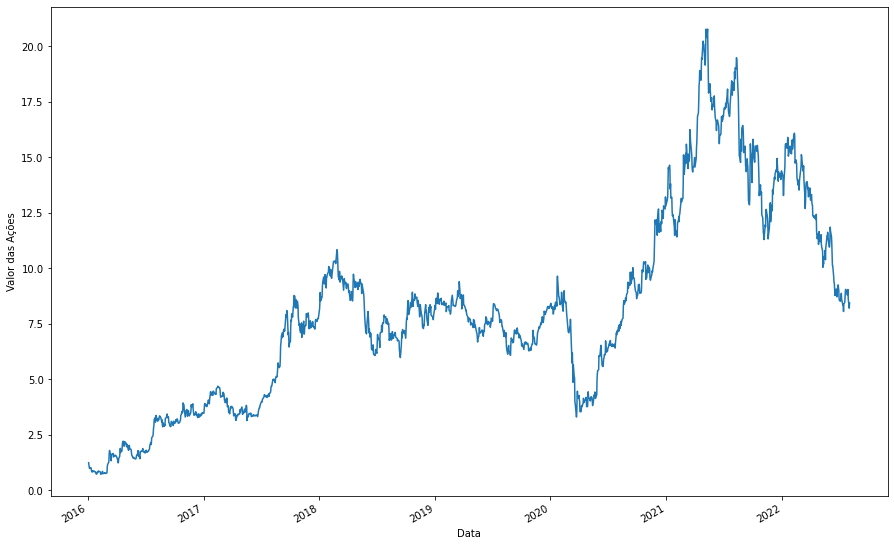

Dados do dataframe:


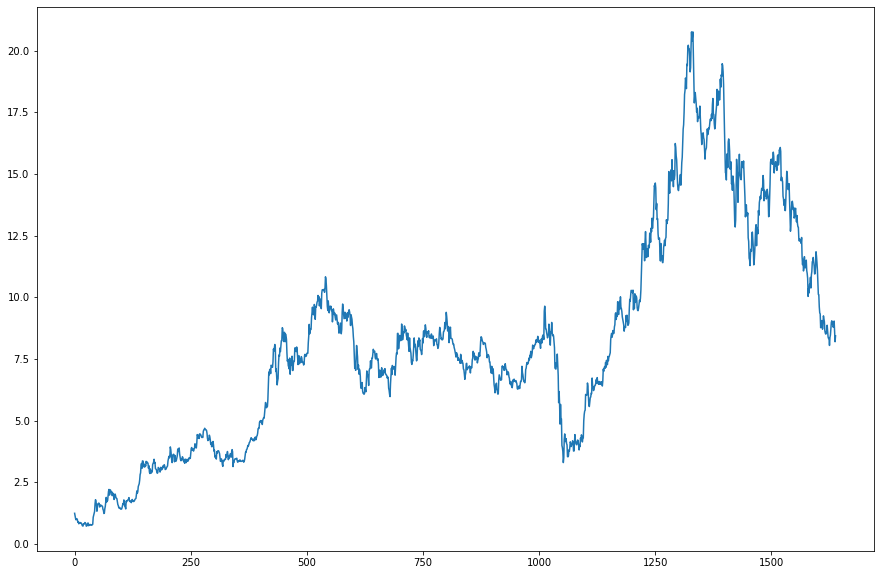

---------------------------------------------------------------------------------------------------
CSN plot original, direto do Yahoo Finance:


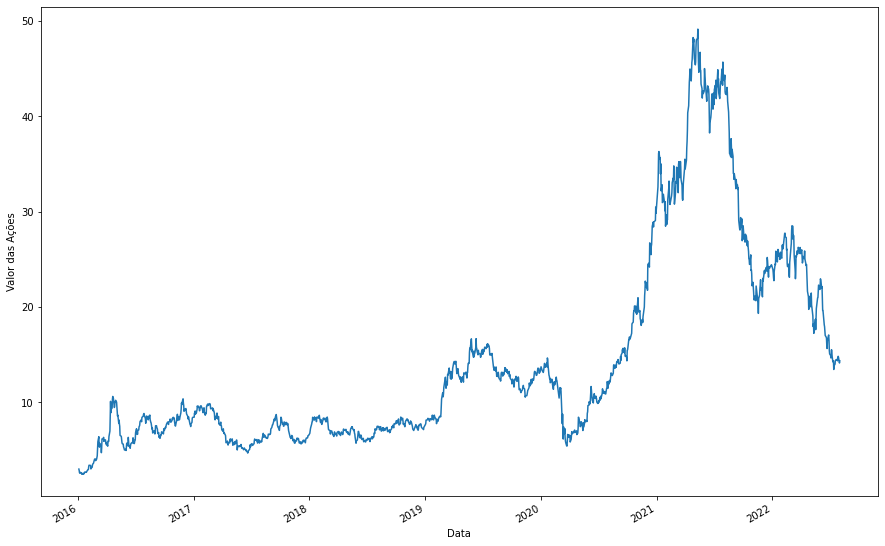

Dados do dataframe:


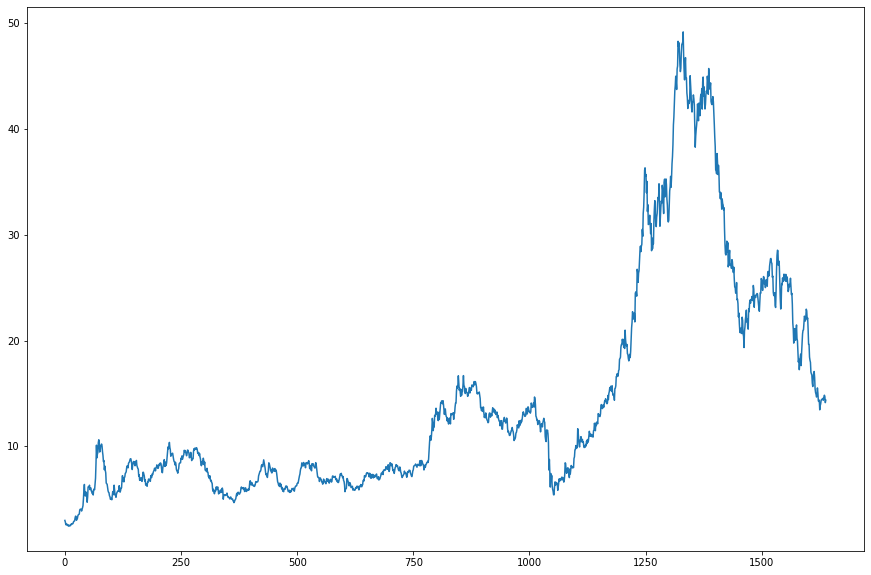

---------------------------------------------------------------------------------------------------
Arcelor Mittal Brasil: 


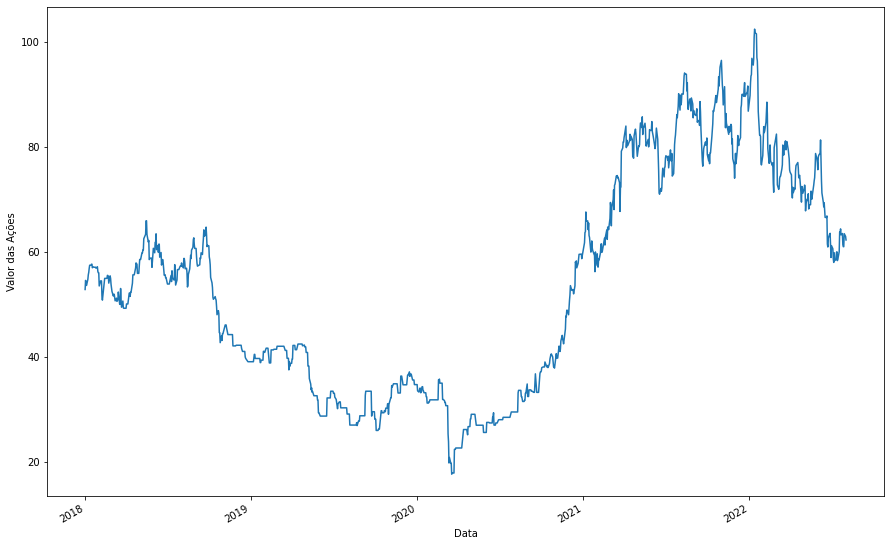

Dados do dataframe:


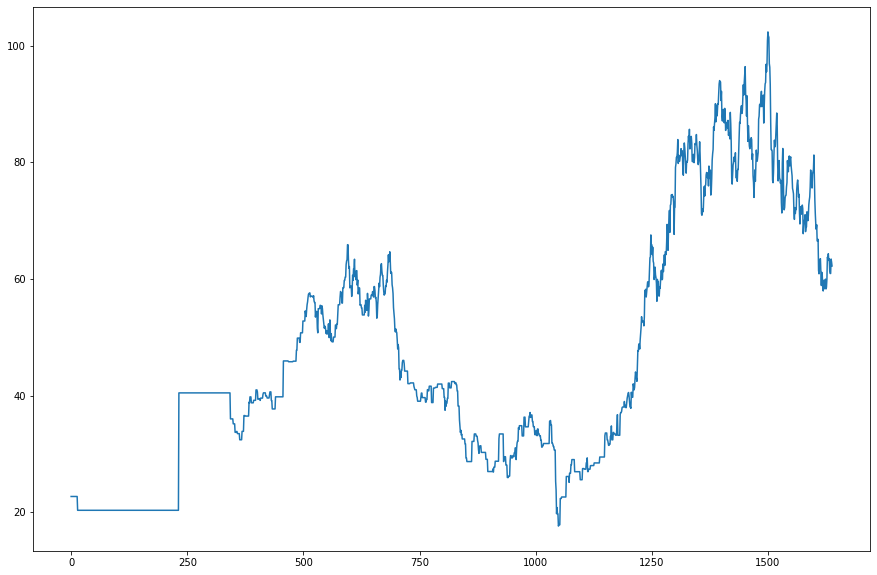

---------------------------------------------------------------------------------------------------


In [46]:
for cod in empresas: # Laço de repetição que vai correr todas as empresas do nosso dicionário;
    
    # Abaixo vou plotar os gráficos com base nos dados do Yahoo finance:
    
    nome = empresas[cod] # Definindo uma váriavel nome;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Puxando a cotação do yahoo finance;
    print(f'{empresas[cod]} plot original, direto do Yahoo Finance:') # Exibindo o título antes do gráfico;
    cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando o tamanho da figura do gráfico a ser plotado;
    plt.xlabel("Data") # Declarando o rótulo do eixo X;
    plt.ylabel("Valor das Ações") # Declarando o rótulo do eixo Y;
    plt.show() # Pedindo ao Python para exibir o gráfico.
    
    # Abaixo vou plotar os gráficos com base nos dados do nosso DataFrame, para comparar e ver se bate;
    
    print(f"Dados do dataframe:") # Declarando título antes da figura do gráfico;
    df[nome].plot(figsize=(15,10)) # Declarando tamanho da figura do gráfico;
    plt.show() # Pedindo ao python para exibir o gráfico
    print(99*'-') # Escrevendo uma linha de separação

# Abaixo repito o processo acima, mas, para a ArcelorMittal, que tem uma data diferente das outras empresas no loop:

cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final) # Solicitando query de cotação da ArcelorMittal;
print('Arcelor Mittal Brasil: ') # ArcelorMittal está com período diferente, pois os dados estavam inconsistentes na fonte;
cotacao['Adj Close'].plot(figsize=(15, 10)) # Declarando tamanho da figura do gráfico, a ser plotado;
plt.xlabel("Data") # Declarando rótulo do eixo X;
plt.ylabel("Valor das Ações") # Declarando rótulo do eixo Y;
plt.show() # Mostrando o gráfico
print("Dados do dataframe:") # Colocando título antes próximo gráfico (com base no DataFrame);
df['ArcelorMittal Brasil'].plot(figsize=(15,10)) # Plotando gráfico;
plt.show() # Exibindo gráfico;
print(99*'-') # Linha de separação;

>Dados verificados visualmente com sucesso!


Porém para maior assertividade eles passarão por uma segunda reavaliação no EXCEL

Agora vou extrair e exportar os arquivos no formato `.csv` para uma segunda verificação do nosso DataFrame no excel

In [48]:
df.to_csv('dataframe.csv') # Salvando nosso DataFrame como arquivo .csv (texto separado por vírgulas)
for cod in empresas: # Laço de repetição correndo as empresas de nosso dicionário;
    cotacao = web.DataReader(cod, data_source='yahoo', start=tempo_inicial, end=tempo_final) # Pedindo a cotação das empresas;
    exportar = cotacao['Adj Close'] # Extraindo a cotação "Ajuste final"
    exportar.to_csv(f'{empresas[cod]}.csv') # Salvando no diretório como .csv
cotacao = web.DataReader('ARMT34.SA', data_source='yahoo', start='01-01-2018', end=tempo_final) # Pedindo a cotação da ArcelorMittal Brasil; 
exportar = cotacao['Adj Close'] # Extraindo a cotacao de "Ajuste Final"
exportar.to_csv('ArcelorMittal Brasil.csv') # Salvando no diretório como .csv

Encerramos então a extração e limpeza dos dados com `Python`, e, a partir daqui, irei revalidar os dados no `Excel`, uma vez revalidados, vamos explorá-los mais a fundo no `PowerBI`.